<a href="https://colab.research.google.com/github/Eyna-A/Brain-Tumor-Classifier/blob/main/Dtoumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/archive.zip /content/

In [ ]:
import zipfile
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
# ایمپورت کتابخونه‌ها
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing import image



In [ ]:
# تنظیم مسیر دیتاست
train_data_dir = '/content/dataset/Training'
test_data_dir = '/content/dataset/Testing'

In [ ]:
# ساخت Data Generator برای آموزش و تست
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128,
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# تعداد کلاس‌ها
num_classes = train_generator.num_classes

In [ ]:
# ساخت مدل CNN

myInput = layers.Input(shape=(64, 64, 1))
conv1 = layers.Conv2D(32, 3, padding='same', strides=2)(myInput)
bn1 = layers.BatchNormalization()(conv1)
ac1 = layers.Activation('relu')(bn1)
conv2 = layers.Conv2D(64, 3, padding='same', strides=2)(ac1)
bn2 = layers.BatchNormalization()(conv2)
ac2 = layers.Activation('relu')(bn2)
flat = layers.Flatten()(ac2)
out_layer = layers.Dense(num_classes, activation='softmax')(flat)

myModel = models.Model(myInput, out_layer)


In [ ]:
# کامپایل کردن مدل
myModel.compile(
    optimizer=optimizers.SGD(learning_rate=0.001),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# آموزش مدل
history = myModel.fit(train_generator, epochs=50, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 466ms/step - accuracy: 0.5177 - loss: 1.1239 - val_accuracy: 0.3097 - val_loss: 1.3556
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 415ms/step - accuracy: 0.7046 - loss: 0.7675 - val_accuracy: 0.3753 - val_loss: 1.3705
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.7665 - loss: 0.6536 - val_accuracy: 0.3333 - val_loss: 1.3976
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 446ms/step - accuracy: 0.7768 - loss: 0.6163 - val_accuracy: 0.3410 - val_loss: 1.4273
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 422ms/step - accuracy: 0.8056 - loss: 0.5510 - val_accuracy: 0.4005 - val_loss: 1.4300
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 423ms/step - accuracy: 0.8087 - loss: 0.5269 - val_accuracy: 0.4035 - val_loss: 1.3696
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 456ms/step - accuracy: 0.8221 - loss: 0.5107 - val_accuracy: 0.4447 - val_loss: 1.2971
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 415ms/step - accuracy: 0.8267 - loss: 0.4810 - val_accu

In [ ]:
# ارزیابی مدل روی داده‌های تست
test_loss, test_accuracy = myModel.evaluate(test_generator)
print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.8564 - loss: 0.4002
Test loss:  0.33056148886680603
Test accuracy:  0.8878718614578247


In [ ]:
# پیش‌ بینی روی داده‌های تست
test_labels_p = myModel.predict(test_generator)
test_labels_p = np.argmax(test_labels_p, axis=1)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


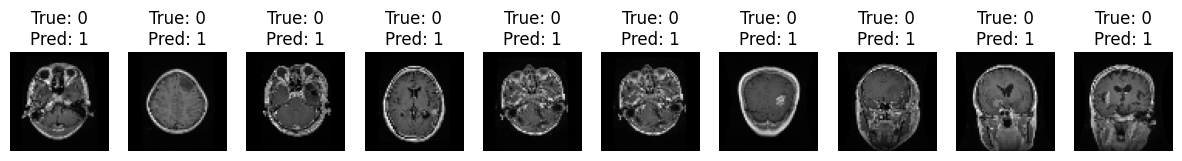

In [ ]:
# نمایش چند پیش‌ بینی اشتباه
n = 0
f, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(len(test_labels_p)):
    if n >= 10:
        break
    if test_labels_p[i] != test_generator.classes[i]:
        img = test_generator[i // test_generator.batch_size][0][i % test_generator.batch_size]
        axs[n].imshow(img.squeeze(), cmap='gray')
        axs[n].set_title(f'True: {test_generator.classes[i]}\nPred: {test_labels_p[i]}')
        axs[n].axis('off')
        n += 1

In [ ]:

def predict_mri_image(image_path, model, target_size=(64, 64)):
    # تصویر رو لود می‌کنیم و به سایز مورد نظر در میاریم
    img = image.load_img(image_path, target_size=target_size, color_mode='grayscale')

    # تصویر رو به آرایه تبدیل می‌کنیم
    img_array = image.img_to_array(img)

    # نرمال‌سازی مقادیر پیکسل‌ها
    img_array = img_array / 255.0

    # چون مدل انتظار داره که یه batch دریافت کنه، یه dimension بهش اضافه می‌کنیم
    img_array = np.expand_dims(img_array, axis=0)

    # پیش‌بینی مدل
    prediction = model.predict(img_array)

    # پیدا کردن کلاس با بیشترین احتمال
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # تبدیل اندیس کلاس به اسم دسته
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # چاپ نتیجه
    print(f"نوع تومور پیش‌ بینی‌شده: {predicted_label}")
    print(f"درصد اطمینان مدل: {confidence:.2f}")

In [ ]:

predict_mri_image('/content/drive/MyDrive/ExampleM.jpg', myModel)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
نوع تومور پیش‌بینی‌شده: notumor
درصد اطمینان مدل: 0.85


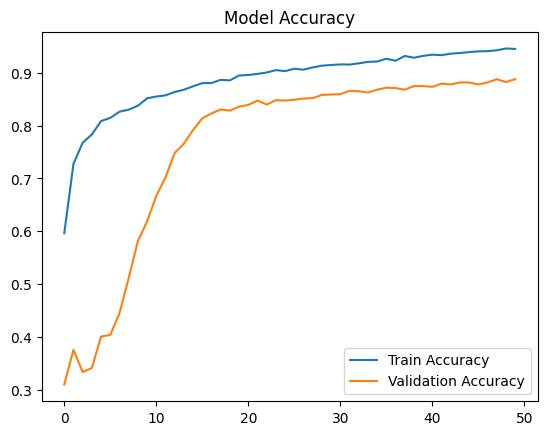

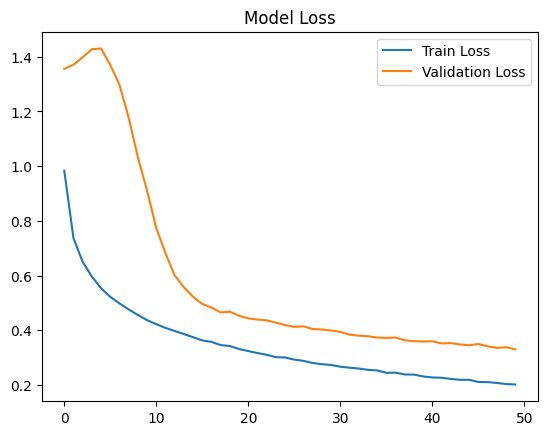

In [ ]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

